In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import json
from sklearn.decomposition import PCA
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
cluster_df = pd.read_csv('AutoEncoder_Cluster_Output_cluster_output_5cls.csv')
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Above Average Cap Rates    4591 non-null   bool   
 1   Address                    4591 non-null   object 
 2   Ae Mse (bin)               4591 non-null   float64
 3   City                       4591 non-null   object 
 4   Cluster Category           4591 non-null   object 
 5   State                      4591 non-null   object 
 6   Year Built                 4591 non-null   float64
 7   Zip                        4591 non-null   int64  
 8   Ae Mse                     4591 non-null   float64
 9   Bathrooms                  4591 non-null   int64  
 10  Bedrooms                   4591 non-null   int64  
 11  Cap gain                   4591 non-null   float64
 12  Cap Rate                   4591 non-null   object 
 13  Child credit               4591 non-null   float

In [41]:
# convert Cap Rate to float
cluster_df['Cap Rate'] = cluster_df['Cap Rate'].str.strip('%').astype(float)/100

<AxesSubplot:xlabel='Cluster Category', ylabel='Cap Rate'>

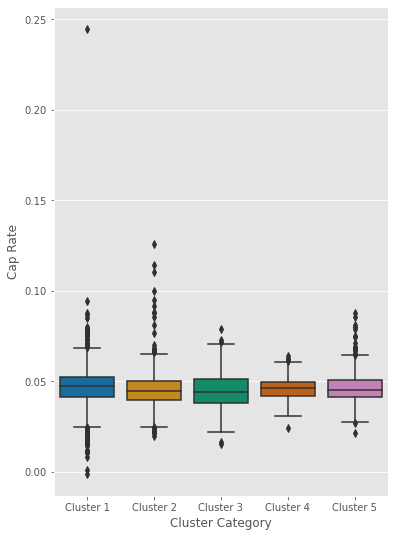

In [75]:
fig, ax = plt.subplots(figsize=(6,9))
sns.boxplot(x = 'Cluster Category', y = 'Cap Rate', data = cluster_df, palette = 'colorblind')

In [54]:
# remove cluster 1 due to extreme outlier to see anomalies
outliers = cluster_df[cluster_df['Cluster Category']!='Cluster 1']
outliers

,Above Average Cap Rates,Address,Ae Mse (bin),City,Cluster Category,State,Year Built,Zip,Ae Mse,Bathrooms,...,Sch Rat Avg,Social security,Student loan ded,Tot Appl,Tot Comm Feat,Two Car Garage 0,Two Car Garage 1,UE claims,Violent Crime Total Rate,Zestimate
7,True,305 Cumberland Drive,0.0,Kingsland,Cluster 2,Georgia,1999.0,31548,0.000196,3,...,8.000000,12.728319,1.067021,3.0,1.000000,0,1,3.546154,3.523,432800.00
9,True,588 Cmg Place,0.0,Woodbine,Cluster 2,Georgia,1997.0,31569,0.001319,3,...,7.333333,13.681579,1.050000,7.0,1.000000,1,0,0.000000,2.600,603000.00
10,False,105 Pinehurst Road,0.0,Kingsland,Cluster 2,Georgia,2022.0,31548,0.001490,2,...,8.000000,12.728319,1.067021,9.0,2.645161,0,1,3.546154,3.523,438600.00
11,False,113 Pinehurst Road,0.0,Kingsland,Cluster 2,Georgia,2022.0,31548,0.001145,2,...,8.000000,12.728319,1.067021,7.0,2.000000,1,0,3.546154,3.523,364400.00
13,False,363 Confederate Point Drive,0.0,White Oak,Cluster 2,Georgia,1991.0,31568,0.000421,3,...,7.333333,14.628571,1.266667,5.0,2.645161,0,1,0.000000,5.979,540966.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,False,1210 Swan Mill Court,0.0,Suwanee,Cluster 5,Georgia,1987.0,30024,0.000583,3,...,7.666667,18.889041,1.114286,6.0,7.000000,0,1,3.331915,1.648,541100.00
4587,True,7340 Breeze Bay Road,0.0,Cumming,Cluster 5,Georgia,1999.0,30041,0.000796,4,...,6.333333,18.884835,1.093085,4.0,2.000000,0,1,3.321622,1.816,567700.00
4588,False,1564 Maddox Lane,0.0,Monroe,Cluster 5,Georgia,2006.0,30656,0.000289,4,...,7.666667,16.290476,1.093443,5.0,2.000000,0,1,2.660000,1.658,538800.00
4589,False,6054 Dogwood Circle,0.0,Buford,Cluster 5,Georgia,1973.0,30518,0.001336,4,...,7.666667,15.437004,1.117536,12.0,5.000000,0,1,3.241176,1.425,505700.00


([<matplotlib.axis.XTick at 0x7fa89e35b0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

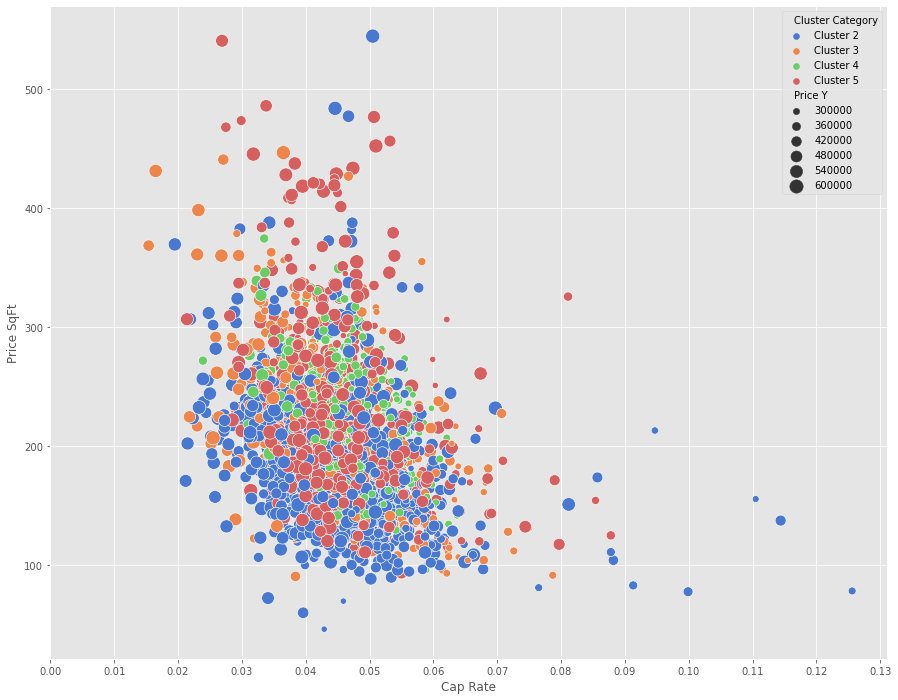

In [69]:
# scatter plot size_order parameter
fig, ax = plt.subplots(figsize=(15,12))

sns.scatterplot(x = "Cap Rate", y = "Price SqFt", data = outliers, 
                hue='Cluster Category',size='Price Y', palette='muted',sizes=(40, 200))

plt.xticks(np.arange(0, max(outliers['Cap Rate'])+0.01, 0.01))


In [59]:
outliers[outliers['Ae Mse']>0.007]

,Above Average Cap Rates,Address,Ae Mse (bin),City,Cluster Category,State,Year Built,Zip,Ae Mse,Bathrooms,...,Sch Rat Avg,Social security,Student loan ded,Tot Appl,Tot Comm Feat,Two Car Garage 0,Two Car Garage 1,UE claims,Violent Crime Total Rate,Zestimate
240,True,275 College Street,0.008,MacOn,Cluster 2,Georgia,1890.00,31201,0.008525,7,...,3.333333,15.605263,1.177778,2.000000,1.000000,0,1,2.175000,11.740,468231.00
273,False,157 Parker Lane,0.008,Richmond Hill,Cluster 5,Georgia,2010.00,31324,0.008389,3,...,7.500000,16.682738,1.148521,10.000000,9.000000,1,0,3.643750,2.253,453900.00
327,True,100 Rock Landing Road,0.008,Midville,Cluster 2,Georgia,2004.00,30441,0.009623,3,...,4.000000,13.025000,0.975000,8.000000,1.000000,1,0,2.750000,3.474,699400.00
444,True,118 Golden Gate Drive,0.006,Pooler,Cluster 2,Georgia,2003.00,31322,0.007802,2,...,4.333333,16.638816,1.168276,11.000000,10.000000,1,0,3.426316,3.211,343600.00
450,False,115 Longwood Drive,0.006,Savannah,Cluster 5,Georgia,1993.00,31405,0.007778,3,...,4.666667,17.062557,1.200769,12.000000,11.000000,1,0,2.935000,4.434,372100.00
459,True,15 Delegal Road,0.006,Savannah,Cluster 5,Georgia,1983.00,31411,0.007837,3,...,4.000000,26.803320,1.000000,14.000000,10.000000,1,0,3.333333,3.048,799200.00
491,True,50 Marsh Salt Lane,0.008,Port Wentworth,Cluster 3,Georgia,2022.00,31407,0.008665,2,...,3.000000,12.790164,1.148333,9.000000,9.000000,1,0,3.471429,4.662,337488.73
1737,False,420 Lagrange Street,0.010,Greenville,Cluster 2,Georgia,1893.00,30222,0.011160,4,...,2.666667,12.413043,0.816667,5.000000,1.000000,0,1,2.160000,4.236,412900.00
2189,False,307 Huntington Manor Court,0.008,Cornelia,Cluster 2,Georgia,1997.23,30529,0.008185,2,...,6.333333,14.567187,1.151429,4.120204,2.645161,1,0,2.714286,2.761,274367.00
2364,False,924 Crump Street,0.008,Swainsboro,Cluster 2,Georgia,1965.79,30401,0.008620,5,...,4.000000,14.357812,1.072727,4.120204,2.645161,1,0,2.023077,2.822,235035.00


<AxesSubplot:xlabel='Cap Rate', ylabel='Price SqFt'>

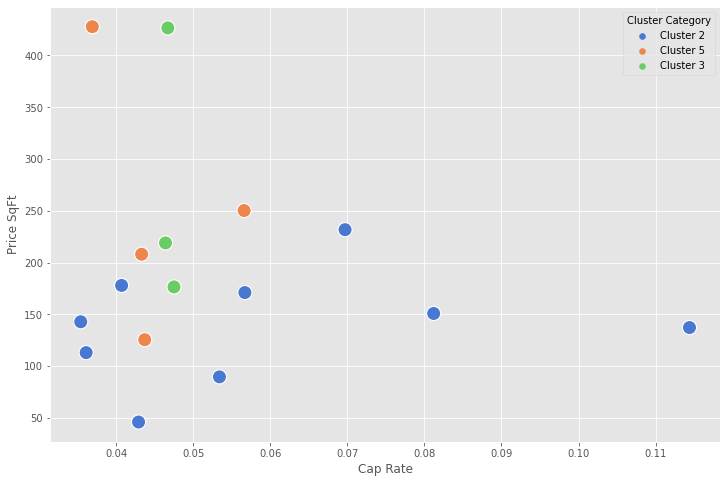

In [70]:
# outliers Ae Mse over 0.007
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x = "Cap Rate", y = "Price SqFt", data = outliers[outliers['Ae Mse']>0.007], 
                hue='Cluster Category', palette='muted', s=200)

# plt.xticks(np.arange(0, max(outliers['Cap Rate'])+0.01, 0.01))

In [79]:
outliers[(outliers['Cap Rate']>0.05) & (outliers['Sch Rat Avg']>5.0)]

,Above Average Cap Rates,Address,Ae Mse (bin),City,Cluster Category,State,Year Built,Zip,Ae Mse,Bathrooms,...,Sch Rat Avg,Social security,Student loan ded,Tot Appl,Tot Comm Feat,Two Car Garage 0,Two Car Garage 1,UE claims,Violent Crime Total Rate,Zestimate
9,True,588 Cmg Place,0.000,Woodbine,Cluster 2,Georgia,1997.0,31569,0.001319,3,...,7.333333,13.681579,1.050000,7.0,1.0,1,0,0.000000,2.600,603000.00
72,True,1641 Jasper Drive #62,0.002,Winder,Cluster 2,Georgia,2009.0,30680,0.002527,3,...,5.666667,13.414159,1.064375,7.0,7.0,1,0,2.703704,2.305,457436.00
90,True,95 Wallace Drive #3,0.000,Winder,Cluster 2,Georgia,2022.0,30680,0.000920,4,...,8.333333,13.414159,1.064375,2.0,1.0,0,1,2.703704,2.305,493796.14
91,True,164 Wallace Drive #6,0.000,Winder,Cluster 2,Georgia,2022.0,30680,0.000972,4,...,8.333333,13.414159,1.064375,2.0,1.0,0,1,2.703704,2.305,518524.90
104,True,3382 Kottayam Court,0.000,Statham,Cluster 2,Georgia,2022.0,30666,0.000421,3,...,5.666667,17.585714,1.036111,6.0,3.0,1,0,2.560000,1.705,435300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,True,541 Bexley Road,0.000,Moreland,Cluster 2,Georgia,2018.0,30259,0.001297,3,...,6.000000,16.393103,1.161538,2.0,1.0,1,0,2.650000,2.109,563400.00
4560,True,232 River Valley Road,0.000,Dawsonville,Cluster 2,Georgia,1991.0,30534,0.001111,4,...,6.333333,16.589868,1.030303,5.0,1.0,1,0,2.968750,2.266,403100.00
4562,True,201 Cagle Court,0.000,McDonough,Cluster 2,Georgia,2004.0,30252,0.000736,4,...,7.000000,15.636986,1.175000,9.0,2.0,1,0,3.167568,1.593,582900.00
4573,True,535 Brook Hollow Drive,0.000,McDonough,Cluster 2,Georgia,2001.0,30252,0.000143,3,...,6.333333,15.636986,1.175000,3.0,2.0,0,1,3.167568,1.593,453400.00


<AxesSubplot:xlabel='Cluster Category', ylabel='Ae Mse'>

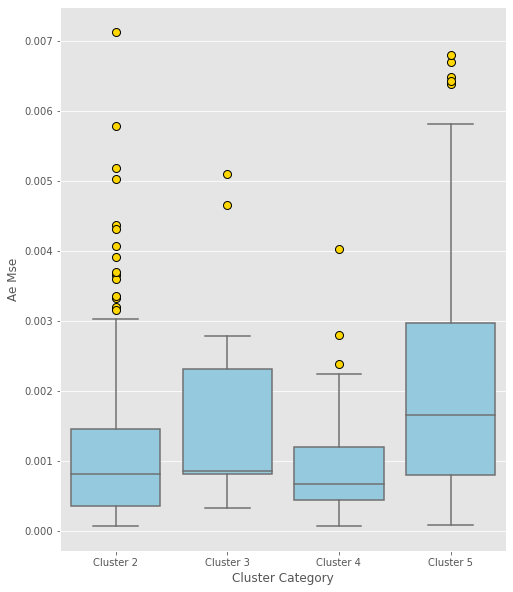

In [104]:
# Filtered on better school rating and higher cap rate
outliers_filtered = outliers[(outliers['Cap Rate']>0.05) & (outliers['Sch Rat Avg']>=5.0)]

flierprops = dict(marker='o', markersize=8, markeredgecolor='black', markerfacecolor='gold')

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(x = 'Cluster Category', y = 'Ae Mse', data = outliers_filtered, 
            order = ['Cluster 2','Cluster 3','Cluster 4','Cluster 5'], 
            color = 'skyblue', flierprops=flierprops)
